In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
import pickle

#### Top 100 Clients for Marketing Outreach

In [2]:
with open('Pickle_Files/Revenue_MF.pkl', 'rb') as f5:
     mutual_fund= pickle.load(f5)
with open('Pickle_Files/Revenue_CC.pkl', 'rb') as f6:
     credit_card= pickle.load(f6)
with open('Pickle_Files/Revenue_CL.pkl', 'rb') as f7:
     consumer_loan= pickle.load(f7)

In [7]:
# Extract top 100 clients and their respective product
marketing_clients = pd.concat([mutual_fund, credit_card, consumer_loan])

marketing_clients.sort_values(by=['Probability'], ascending=False,inplace=True)

marketing_clients.drop_duplicates(subset='Client', keep='first',inplace=True)

top_100_revenues = marketing_clients.head(100)

display(top_100_revenues['Product'].value_counts())
top_100_revenues

Product
CC    80
MF    20
Name: count, dtype: int64

,Client,Revenue,Probability,Product
560,1487,3.884743,0.87,CC
399,978,11.384811,0.87,CC
32,1076,6.343304,0.87,CC
52,19,4.588461,0.85,CC
325,1262,3.857543,0.84,CC
...,...,...,...,...
103,1414,7.283686,0.43,CC
191,710,2.392539,0.43,CC
285,951,4.588114,0.43,CC
215,1526,2.762964,0.43,CC


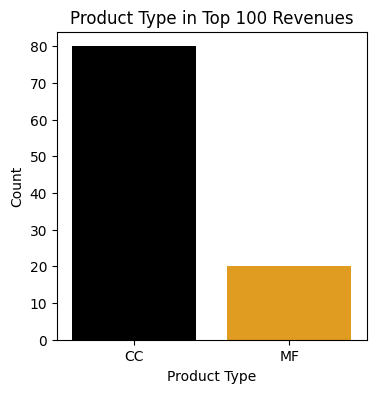

In [8]:

warnings.filterwarnings("ignore")
fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

sns.countplot(x='Product', data=top_100_revenues, palette=["black", "orange", "red"], ax=ax1)
ax1.set_xlabel('Product Type')
ax1.set_ylabel('Count')
ax1.set_title('Product Type in Top 100 Revenues')

plt.show()

In [9]:
# Potential Revenue Generated

print(f'Potential revenue to be generated: { int(top_100_revenues["Revenue"].sum())} EUR')

Potential revenue to be generated: 1084 EUR


In [10]:
output_folder_path = 'Excel_files'

# Generating a new excel file with the corresponding excel folder
output_excel_path = os.path.join(output_folder_path, 'Client_Revenue.xlsx')

top_100_revenues.to_excel(output_excel_path, index=False)